# ASSOCIATION RULES

## Data Preprocessing:

#### Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  

In [37]:
#import pandas and numpy library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [38]:
#Load the Excel file
df = pd.read_excel("Online retail.xlsx", sheet_name="Sheet1",header=None)
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [39]:
#Get shape of the dataset
df.shape

(7501, 1)

In [40]:
#Check for null values
df.isnull().sum()

0    0
dtype: int64

In [41]:
#Check for dplicate
df.duplicated().sum()

np.int64(2325)

In [42]:
#drop duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [43]:
#translate data as comma seperated values
items_column_name = df.columns[0]
transactions = df[items_column_name].apply(lambda x: x.split(','))
for i, transaction in enumerate(transactions.head(5)):
    print(f"Transaction {i+1}: {transaction}")

Transaction 1: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
Transaction 2: ['burgers', 'meatballs', 'eggs']
Transaction 3: ['chutney']
Transaction 4: ['turkey', 'avocado']
Transaction 5: ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [44]:
#import TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

# Convert transactions to one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

#convert to dataframe
df = pd.DataFrame(te_array, columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## Association Rule Mining:

#### •	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.

In [45]:
#import apriori 
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets with minimum support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets.head()


,support,itemsets
0,0.113794,(burgers)
1,0.103555,(cake)
2,0.054869,(champagne)
3,0.083849,(chicken)
4,0.205178,(chocolate)


#### •	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.

In [46]:
#import association_rules
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(chocolate),0.299845,0.205178,0.073223,0.244201,1.190193,1.0,0.011701,1.051632,0.228235,0.169575,0.049097,0.300537
1,(chocolate),(mineral water),0.205178,0.299845,0.073223,0.356874,1.190193,1.0,0.011701,1.088674,0.201051,0.169575,0.081451,0.300537
2,(spaghetti),(chocolate),0.229521,0.205178,0.055835,0.243266,1.185635,1.0,0.008742,1.050332,0.203212,0.147374,0.047920,0.257697
3,(chocolate),(spaghetti),0.205178,0.229521,0.055835,0.272128,1.185635,1.0,0.008742,1.058537,0.196988,0.147374,0.055300,0.257697
4,(mineral water),(eggs),0.299845,0.208076,0.070131,0.233892,1.124070,1.0,0.007741,1.033698,0.157645,0.160194,0.032599,0.285470


#### •	Set appropriate threshold for support, confidence and lift to extract meaning full rules.

In [47]:
#Apply association rule
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
#set threshold
rules = rules[(rules['support'] >= 0.02) & (rules['confidence'] >= 0.09) & (rules['lift'] >= 1.2)]
# Sort by lift descending
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
11,(ground beef),(mineral water),0.058733,0.432432,1.442184
13,(ground beef),(spaghetti),0.055835,0.411095,1.791102
15,(milk),(mineral water),0.067813,0.398864,1.330231
9,(frozen vegetables),(mineral water),0.050425,0.388393,1.295310
19,(spaghetti),(mineral water),0.085008,0.370370,1.235204
16,(milk),(spaghetti),0.050039,0.294318,1.282316
18,(mineral water),(spaghetti),0.085008,0.283505,1.235204
12,(spaghetti),(ground beef),0.055835,0.243266,1.791102
14,(mineral water),(milk),0.067813,0.226160,1.330231
17,(spaghetti),(milk),0.050039,0.218013,1.282316


## Analysis and Interpretation:

#### •	Analyse the generated rules to identify interesting patterns and relationships between the products.

##### **1. Strong Pairings with Ground Beef**
Ground beef - Spaghetti

Confidence: 41%

Lift: 1.79 (highest in the dataset)

Interpretation: Customers buying ground beef are highly likely to also buy spaghetti. This suggests a common meal combination (e.g., spaghetti with meat sauce).

Spaghetti - Ground beef

Confidence: 24%

Lift: 1.79

Reinforces the bidirectional relationship: spaghetti buyers also tend to pick ground beef.

**2. Mineral Water as a Frequent Companion**
Appears as a consequent in multiple rules:

Ground beef - Mineral water (Confidence: 43%, Lift: 1.44)

Milk - Mineral water (Confidence: 40%, Lift: 1.33)

Frozen vegetables - Mineral water (Confidence: 39%, Lift: 1.29)

Spaghetti - Mineral water (Confidence: 37%, Lift: 1.23)

Interpretation: Mineral water is a common add-on purchase across diverse categories. It acts like a "neutral staple" that accompanies many food items.

**3. Milk’s Dual Associations**
Milk - Mineral water (Confidence: 40%, Lift: 1.33)

Milk - Spaghetti (Confidence: 29%, Lift: 1.28)

Suggests milk is often bought alongside both beverages and meal ingredients, possibly reflecting family-oriented shopping baskets.

**4. Frozen Vegetables - Mineral Water**

Confidence: 39%, Lift: 1.29

Indicates health-conscious buyers may pair frozen vegetables with mineral water, reflecting a "healthy lifestyle" basket.

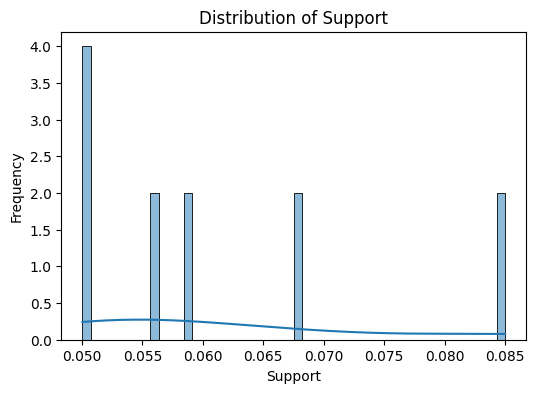

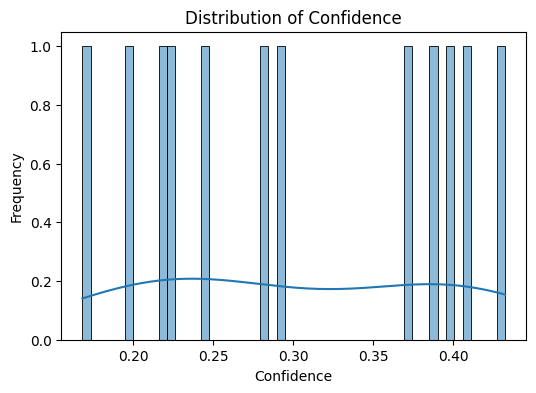

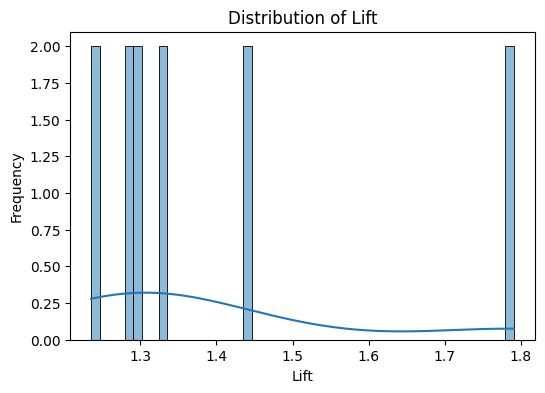

In [48]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of support
plt.figure(figsize=(6, 4))
sns.histplot(rules['support'], bins=50, kde=True)
plt.title('Distribution of Support')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of confidence
plt.figure(figsize=(6, 4))
sns.histplot(rules['confidence'], bins=50, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of lift
plt.figure(figsize=(6, 4))
sns.histplot(rules['lift'], bins=50, kde=True)
plt.title('Distribution of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

#### •	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.

##### **1. Meal-Oriented Shopping Patterns**
Ground beef - Spaghetti

Highest lift (1.79) and strong confidence values.

Customers buying ground beef are very likely to also buy spaghetti, and vice versa.

This indicates a classic meal combination (spaghetti with meat sauce), showing that shoppers often plan meals when purchasing.

**2. Mineral Water as a Universal Add-On**
Appears as a consequent in multiple rules (linked with ground beef, milk, spaghetti, frozen vegetables).

Confidence values range from 19%–43%, with lifts above 1.2.

Suggests mineral water is a common complementary purchase across diverse product categories.

Customers may habitually add mineral water to their basket, regardless of the main food item.

**3. Milk’s Versatile Role**
Milk - Mineral water (Confidence: 40%, Lift: 1.33)

Milk - Spaghetti (Confidence: 29%, Lift: 1.28)

Milk connects both beverages and meal ingredients, suggesting it is part of family-oriented baskets.

Customers buying milk may be stocking up for multiple household needs.

**4. Health-Conscious Basket**
Frozen vegetables - Mineral water (Confidence: 39%, Lift: 1.29).

Indicates that health-conscious buyers often pair vegetables with mineral water, reflecting a healthy lifestyle shopping pattern.


## Interview Questions:

#### 1.	What is lift and why is it important in Association rules?

##### **Definition:** 
Lift measures how much more likely two items are to be bought together compared to if they were independent.

**Interpretation:**

Lift > 1: Positive association (items occur together more often than expected).

Lift = 1: No association (items occur together purely by chance).

Lift < 1: Negative association (items occur together less often than expected).

**Importance:**  
Lift helps identify true correlations rather than coincidental co-occurrences. For example, if spaghetti and ground beef have a lift of 1.79, it means they are bought together 79% more often than chance would predict — a strong signal for meal-based bundling.

#### 2.	What is support and Confidence. How do you calculate them?

#### **Support: Definition:**  
The proportion of transactions in which both items appear.

formula:  **Support(𝐴→𝐵)=Transactions containing A and B/Total transactions**

**Example:** If 5% of all baskets contain both spaghetti and ground beef, support = 0.05.

**Importance:** Support ensures rules are statistically significant (not based on rare events).


#### **Confidence: Definition:**  

The probability that a transaction containing item A also contains item B.

formula:  **Confidence(𝐴→𝐵)=Transactions containing A and B/Transactions containing A**

**Example:** If 40% of baskets with ground beef also contain spaghetti, confidence = 0.40.

**Importance:** Confidence measures reliability of the rule (likelihood of co-purchase).

Together with Lift, they provide a full picture of association strength.

#### 3.	What are some limitations or challenges of Association rules mining?

#### limitations or challenges of Association rules mining:
**Imbalance in Support:**
Rare but meaningful item combinations may be missed if minimum support thresholds are set too high.

**Too Many Rules:**
Large datasets can generate thousands of rules, making it difficult to filter out the truly useful ones.

**Redundancy:**
Many rules may overlap or be variations of the same pattern, requiring pruning or ranking.

**Lack of Causality:** 
Association rules show correlation, not causation. Just because milk and mineral water are often bought together doesn’t mean one causes the other.

**Context Ignorance:** 
Rules don’t account for external factors like seasonality, promotions, or customer demographics.

**Computational Complexity:**
Mining association rules on very large datasets can be resource-intensive.